**1. LSTM Model**

In [ ]:
pip install tensorflow numpy matplotlib


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Flatten, Input, Reshape, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np

%matplotlib inline


**Preprocessing Function**

In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
IMG_SIZE = (128, 128)  # Resize images for uniform input
BATCH_SIZE = 32

# Load data
def load_data(data_dir='/content/data'):
    data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_data = data_gen.flow_from_directory(
        data_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='training'
    )
    val_data = data_gen.flow_from_directory(
        data_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )
    return train_data, val_data

train_data, val_data = load_data()


Found 12 images belonging to 2 classes.
Found 3 images belonging to 2 classes.


Found 12 images belonging to 2 classes.
Found 3 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3333 - loss: 0.7699 - val_accuracy: 0.3333 - val_loss: 0.8633
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step - accuracy: 0.6667 - loss: 0.9447 - val_accuracy: 0.6667 - val_loss: 0.7030
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5833 - loss: 7.3726 - val_accuracy: 0.6667 - val_loss: 6.2286
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4167 - loss: 165.5774 - val_accuracy: 0.6667 - val_loss: 29.5966
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 783ms/step - accuracy: 0.7500 - loss: 16.0368 - val_accuracy: 1.0000 - val_loss: 0.2114
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step - accuracy: 0.5000 - loss: 10.1358 - val_accuracy: 0.3333 - val_loss: 565.9489
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 1853.8594 - val_accuracy: 0.3333 - val_loss: 362.9492
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4167 - loss: 2296.1270 - val_accuracy: 0.0000e+00 - val_loss: 98.2

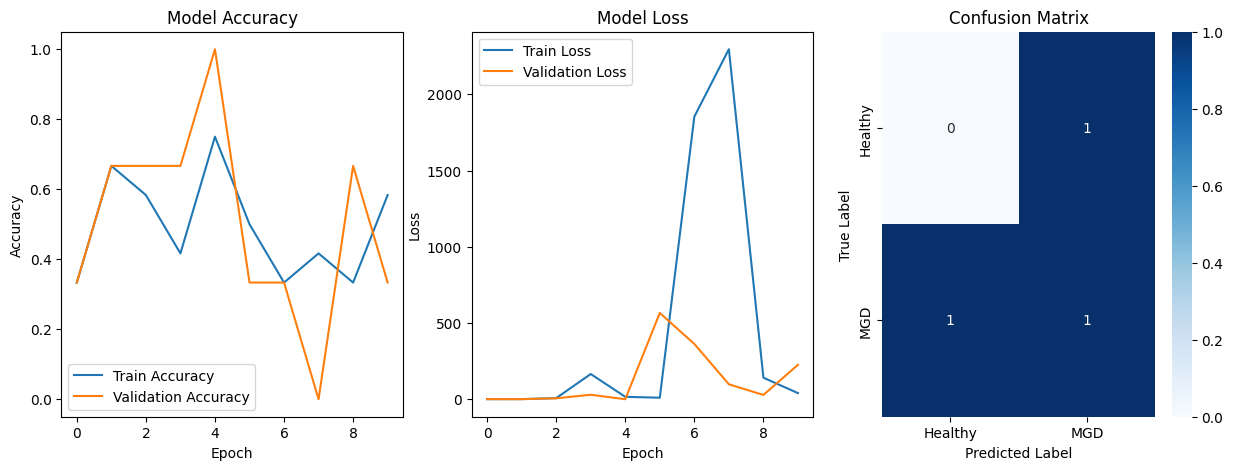

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00         1
         MGD       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



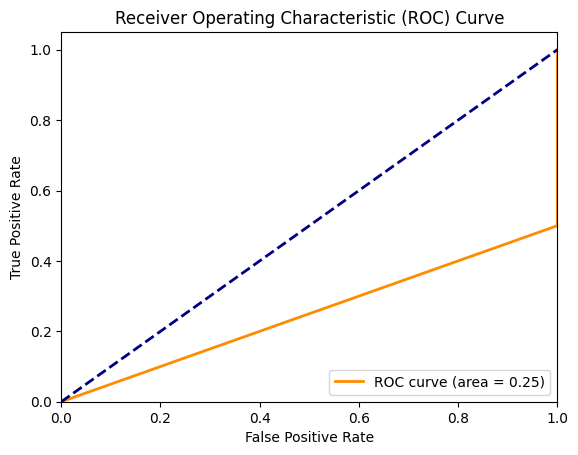

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00         1
         MGD       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



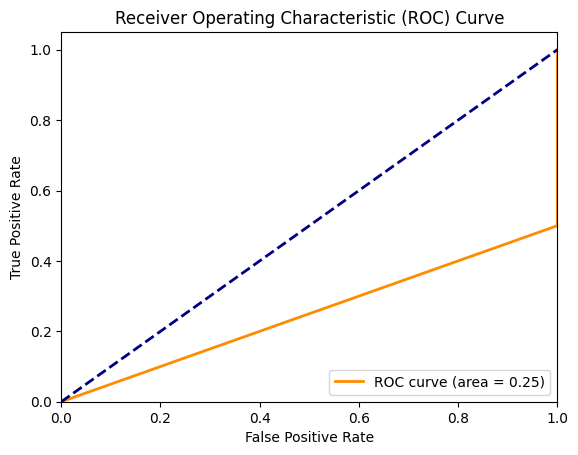

In [ ]:
# Define and import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Input, Reshape

# Prepare data loading function
def load_data(data_dir):
    IMG_SIZE = (128, 128)
    BATCH_SIZE = 32
    data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)
    train_data = data_gen.flow_from_directory(
        data_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='training'
    )
    val_data = data_gen.flow_from_directory(
        data_dir,
        target_size=IMG_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='binary',
        subset='validation'
    )
    return train_data, val_data

# Load the data
train_data, val_data = load_data('/content/data')

# Define the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Reshape((128, 128 * 3)),
        LSTM(128, activation='relu', return_sequences=True),
        LSTM(64, activation='relu'),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train the LSTM model
lstm_model = create_lstm_model((128, 128, 3))
history_lstm = lstm_model.fit(train_data, validation_data=val_data, epochs=10)

def plot_metrics(history, model, val_data):
    # Plot training & validation accuracy and loss
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Confusion Matrix and Predictions
    val_labels = val_data.classes
    val_pred_probs = model.predict(val_data)

    # Convert probabilities to binary class predictions
    val_preds = (val_pred_probs > 0.5).astype("int32")

    # Replace NaN values with 0 in predictions if any
    val_preds = np.nan_to_num(val_preds)
    val_pred_probs = np.nan_to_num(val_pred_probs)

    # Confusion Matrix
    cm = confusion_matrix(val_labels, val_preds)
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'MGD'], yticklabels=['Healthy', 'MGD'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(val_labels, val_preds, target_names=['Healthy', 'MGD'], zero_division=0))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(val_labels, val_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


    # Classification Report
    print("Classification Report:")
    print(classification_report(val_labels, val_preds, target_names=['Healthy', 'MGD']))

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(val_labels, val_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot the metrics for the LSTM model
plot_metrics(history_lstm, lstm_model, val_data)


**GRU Model**

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6667 - loss: 0.6767 - val_accuracy: 0.6667 - val_loss: 0.7196
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step - accuracy: 0.6667 - loss: 0.5910 - val_accuracy: 0.6667 - val_loss: 0.6478
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.6667 - loss: 0.5101 - val_accuracy: 0.6667 - val_loss: 0.6203
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - accuracy: 0.7500 - loss: 0.4339 - val_accuracy: 0.6667 - val_loss: 0.6584
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step - accuracy: 1.0000 - loss: 0.3724 - val_accuracy: 0.6667 - val_loss: 0.7190
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 1.0000 - loss: 0.3142 - val_accuracy: 0.6667 - val_loss: 0.7540
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step - accuracy: 1.0000 - loss: 0.2559 - val_accuracy: 0.6667 - val_loss: 0.7657
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 624ms/step - accuracy: 1.0000 - loss: 0.2044 - val_accuracy: 0.6667 - val_loss: 0.

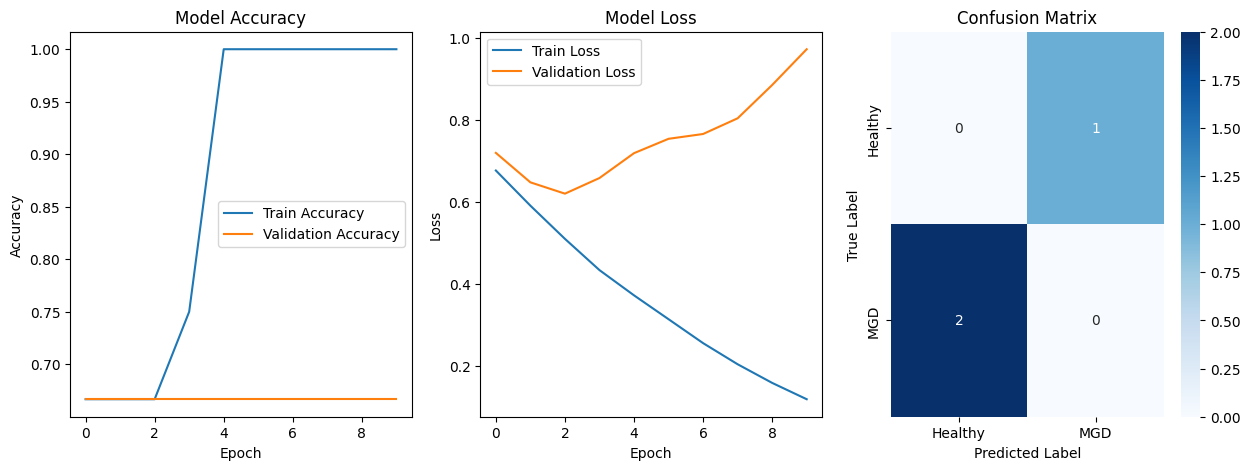

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.00      0.00      0.00       1.0
         MGD       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



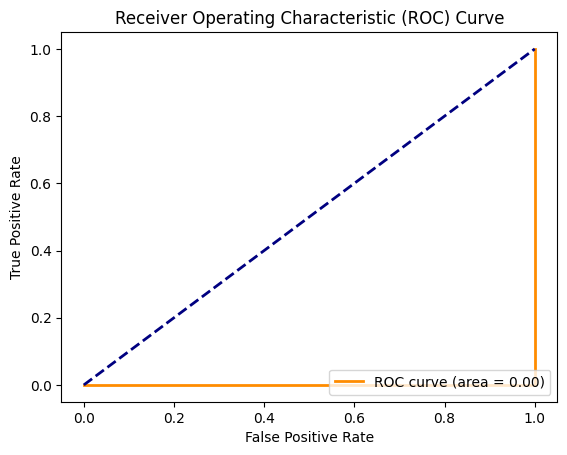

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 1.0000 - loss: 0.0856 - val_accuracy: 0.6667 - val_loss: 1.0340
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 1.0000 - loss: 0.0586 - val_accuracy: 0.6667 - val_loss: 1.0637
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step - accuracy: 1.0000 - loss: 0.0384 - val_accuracy: 0.6667 - val_loss: 1.1186
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - accuracy: 1.0000 - loss: 0.0239 - val_accuracy: 0.6667 - val_loss: 1.2367
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step - accuracy: 1.0000 - loss: 0.0142 - val_accuracy: 0.6667 - val_loss: 1.3920
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.6667 - val_loss: 1.5766
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.6667 - val_loss: 1.7767
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.6667 - val_loss:

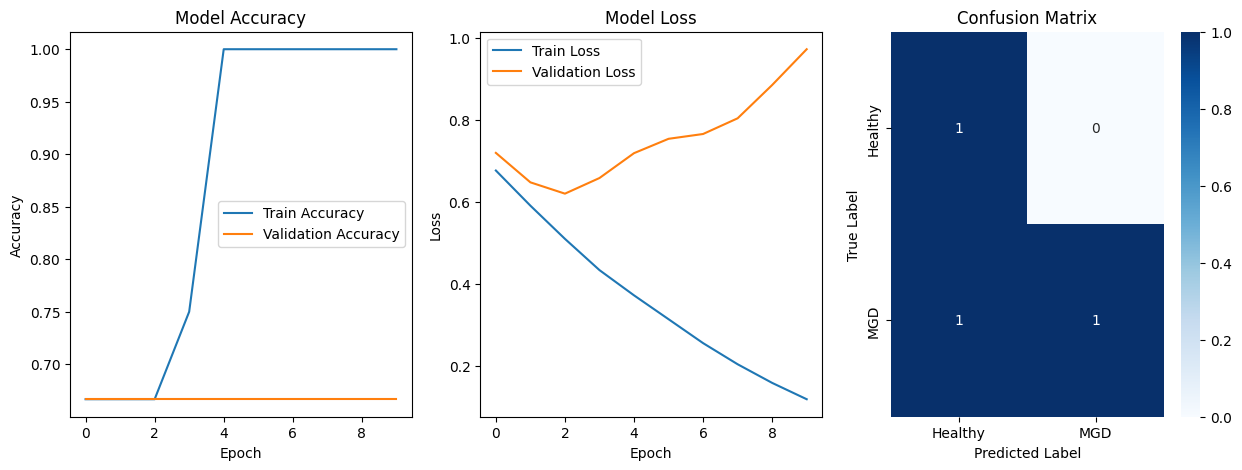

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.50      1.00      0.67         1
         MGD       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



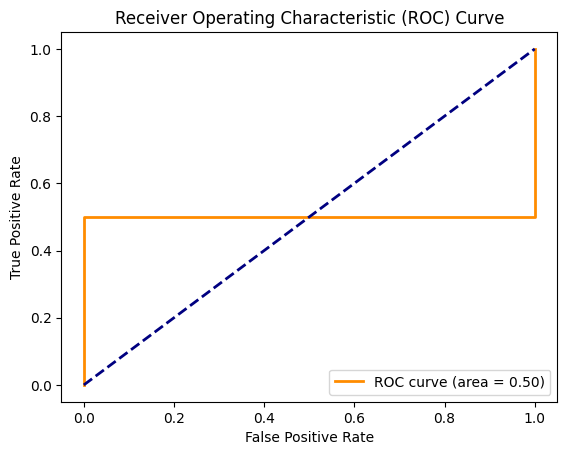

In [ ]:
def create_gru_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        Reshape((128, 128 * 3)),
        GRU(128, activation='relu', return_sequences=True),
        GRU(64, activation='relu'),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

gru_model = create_gru_model((128, 128, 3))
history_gru = gru_model.fit(train_data, validation_data=val_data, epochs=10)
plot_metrics(history_gru, gru_model, val_data)


# Train the GRU model
gru_model.fit(train_data, validation_data=val_data, epochs=10)

def plot_metrics(history, model, val_data):
    plt.figure(figsize=(15, 5))

    # Accuracy and Loss plots
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Predictions and Confusion Matrix
    val_labels = val_data.classes
    val_pred_probs = model.predict(val_data)
    val_preds = (val_pred_probs > 0.5).astype("int32")

    # Handle NaN in predictions
    val_preds = np.nan_to_num(val_preds)
    val_pred_probs = np.nan_to_num(val_pred_probs)

    # Confusion Matrix
    cm = confusion_matrix(val_labels, val_preds)
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'MGD'], yticklabels=['Healthy', 'MGD'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(val_labels, val_preds, target_names=['Healthy', 'MGD'], zero_division=0))

    # ROC Curve
    fpr, tpr, _ = roc_curve(val_labels, val_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot the metrics for the GRU model
plot_metrics(history_gru, gru_model, val_data)

**ResNet Model**

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 54s 54s/step - accuracy: 0.3333 - loss: 0.8919 - val_accuracy: 0.3333 - val_loss: 1.5807
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.3333 - val_loss: 1.8898
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 2.0410e-04 - val_accuracy: 0.3333 - val_loss: 1.0608
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 8.5112e-05 - val_accuracy: 0.3333 - val_loss: 7.6754
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 5.5693e-05 - val_accuracy: 0.3333 - val_loss: 10.7469
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 4.2169e-05 - val_accuracy: 0.3333 - val_loss: 14.3933
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 3.2569e-05 - val_accuracy: 0.3333 - val_loss: 19.0828
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 2.7320e-05 - val_accuracy: 0.3333 - val_

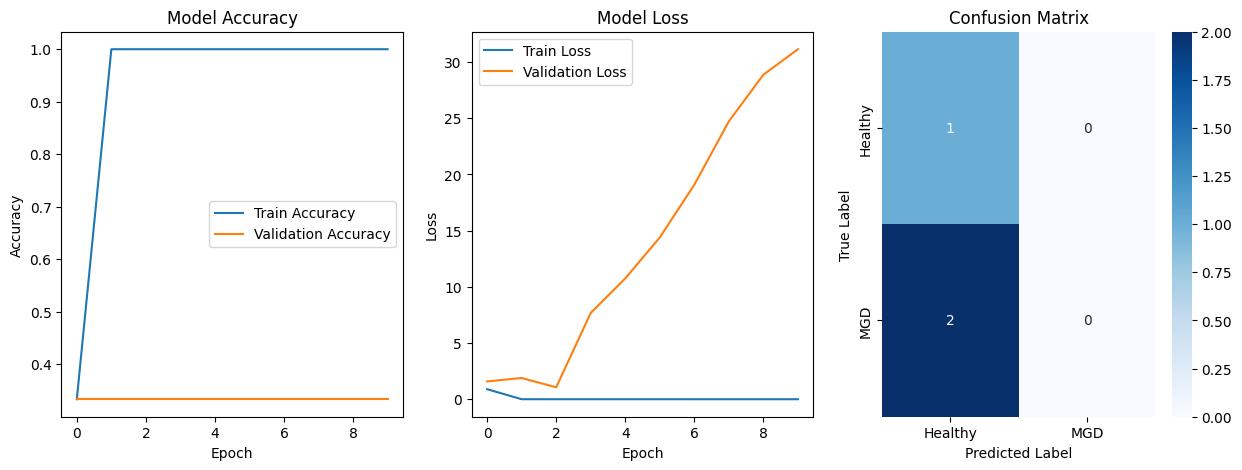

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.33      1.00      0.50         1
         MGD       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



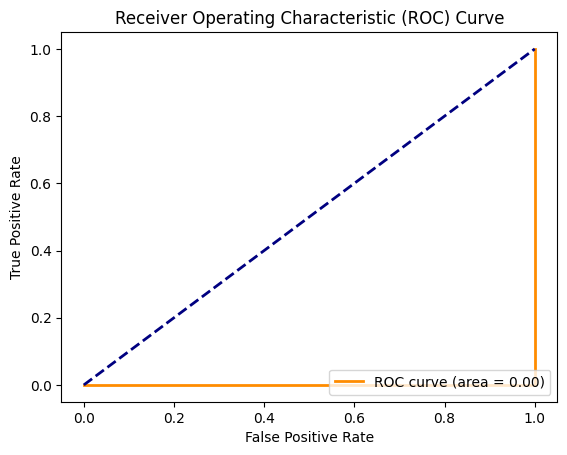

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


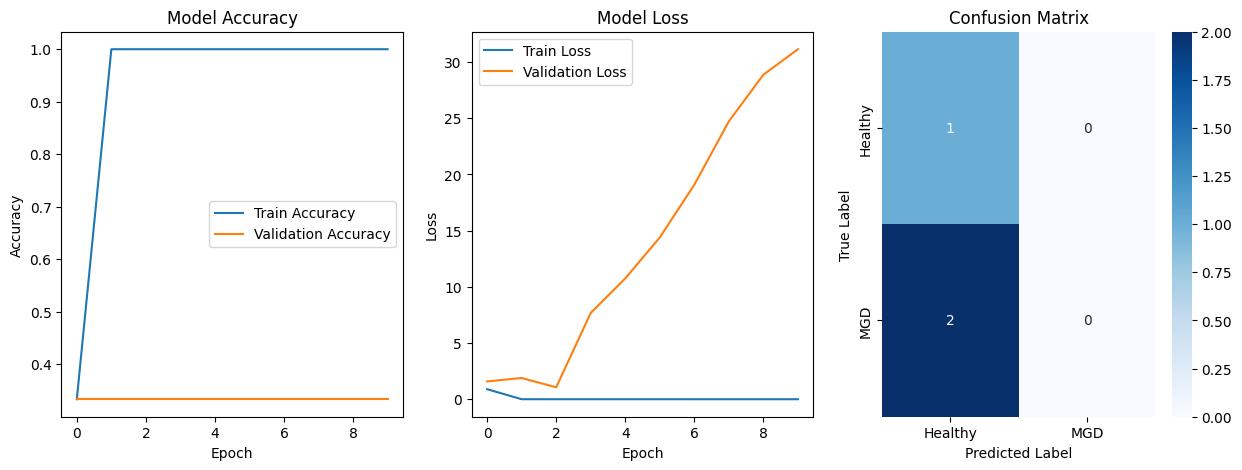

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.33      1.00      0.50         1
         MGD       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



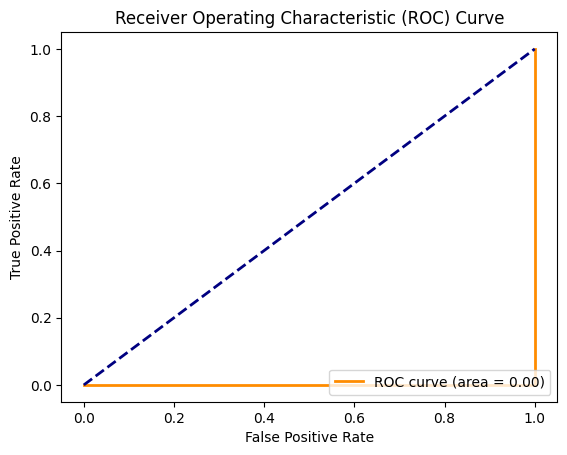

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

def create_resnet_model(input_shape):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

resnet_model = create_resnet_model((128, 128, 3))
history_resnet = resnet_model.fit(train_data, validation_data=val_data, epochs=10)
plot_metrics(history_resnet, resnet_model, val_data)

def plot_metrics(history, model, val_data):
    plt.figure(figsize=(15, 5))

    # Accuracy and Loss plots
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Predictions and Confusion Matrix
    val_labels = val_data.classes
    val_pred_probs = model.predict(val_data)
    val_preds = (val_pred_probs > 0.5).astype("int32")

    # Handle NaN in predictions
    val_preds = np.nan_to_num(val_preds)
    val_pred_probs = np.nan_to_num(val_pred_probs)

    # Confusion Matrix
    cm = confusion_matrix(val_labels, val_preds)
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'MGD'], yticklabels=['Healthy', 'MGD'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(val_labels, val_preds, target_names=['Healthy', 'MGD'], zero_division=0))

    # ROC Curve
    fpr, tpr, _ = roc_curve(val_labels, val_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
# Plot the metrics for the ResNet model
plot_metrics(history_resnet, resnet_model, val_data)

**Inception (GoogLeNet) Model**

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 56s 56s/step - accuracy: 0.6667 - loss: 0.6315 - val_accuracy: 0.6667 - val_loss: 0.5147
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.1327 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0306 - val_accuracy: 0.6667 - val_loss: 2.0951
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.6667 - val_loss: 4.9642
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 3.6768e-04 - val_accuracy: 0.3333 - val_loss: 6.8322
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 1.0875e-04 - val_accuracy: 0.3333 - val_loss: 8.3891
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 4.5546e-05 - val_accuracy: 0.3333 - val_loss: 11.0925
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 2.7354e-05 - val_accuracy: 0.3333 - val_loss: 14.6

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


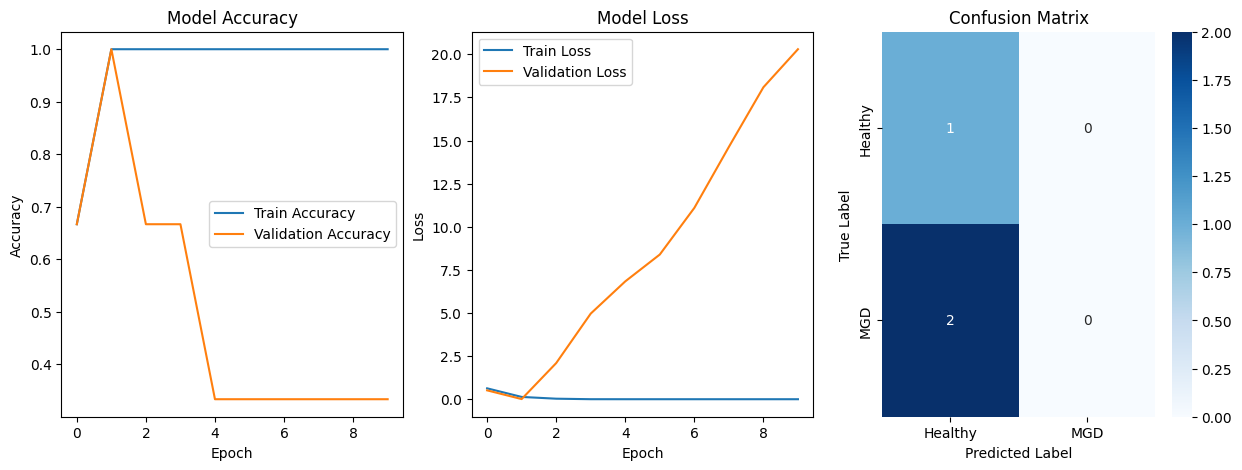

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.33      1.00      0.50         1
         MGD       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



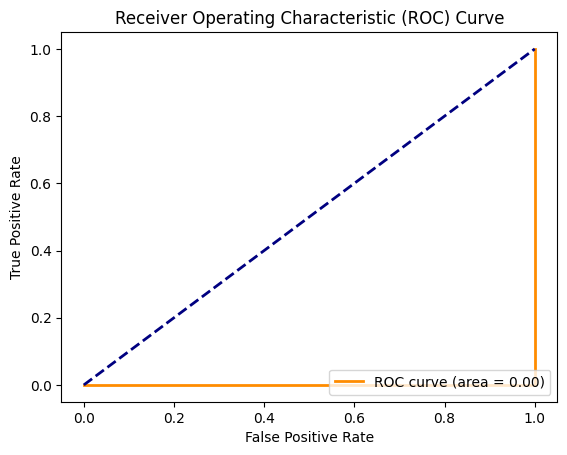

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


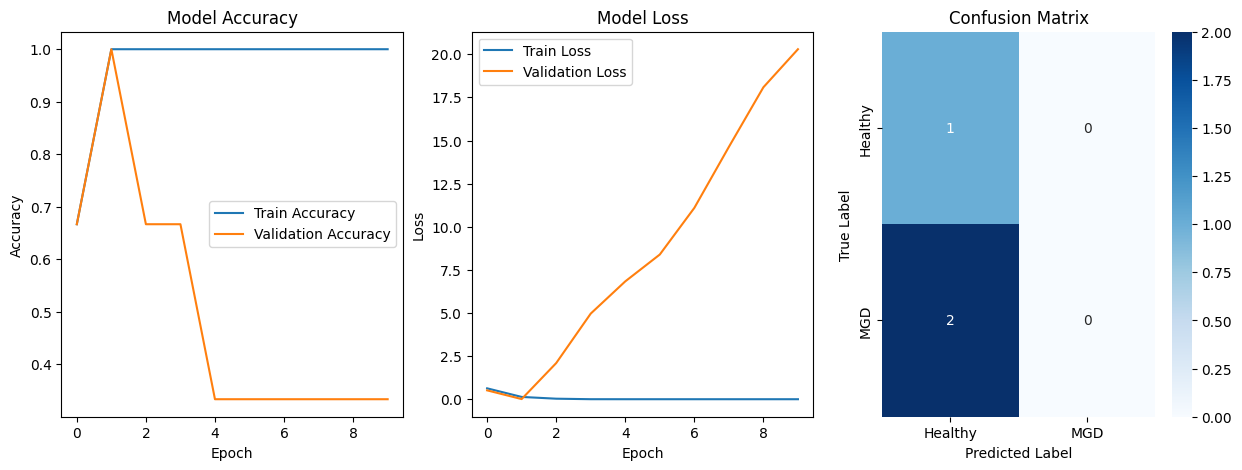

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.33      1.00      0.50         1
         MGD       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



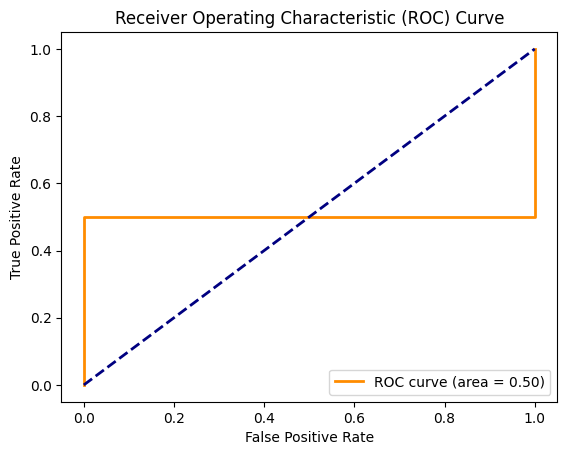

In [ ]:
from tensorflow.keras.applications import InceptionV3

def create_inception_model(input_shape):
    base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

inception_model = create_inception_model((128, 128, 3))
history_inception = inception_model.fit(train_data, validation_data=val_data, epochs=10)
plot_metrics(history_inception, inception_model, val_data)
def plot_metrics(history, model, val_data):
    plt.figure(figsize=(15, 5))

    # Accuracy and Loss plots
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Predictions and Confusion Matrix
    val_labels = val_data.classes
    val_pred_probs = model.predict(val_data)
    val_preds = (val_pred_probs > 0.5).astype("int32")

    # Handle NaN in predictions
    val_preds = np.nan_to_num(val_preds)
    val_pred_probs = np.nan_to_num(val_pred_probs)

    # Confusion Matrix
    cm = confusion_matrix(val_labels, val_preds)
    plt.subplot(1, 3, 3)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Healthy', 'MGD'], yticklabels=['Healthy', 'MGD'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Classification Report
    print("Classification Report:")
    print(classification_report(val_labels, val_preds, target_names=['Healthy', 'MGD'], zero_division=0))

    # ROC Curve
    fpr, tpr, _ = roc_curve(val_labels, val_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


# Plot the metrics for the Inception model
plot_metrics(history_inception, inception_model, val_data)
